<a href="https://colab.research.google.com/github/Ximenaloranca/Ecuaciones-Diferenciales-Parciales-/blob/main/Metodo_de_colocacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método de Colocación**

Este metodo es una tecnica numerica importante. Su objetivo es obtener soluciones aproximadas a ecuaciones diferenciales (ordinarias o parciales) que son dificiles o imposibles de resolver analiticamente.

Podemos entender el metodo dada una ecuacion diferencial definida por un operador $L$ que actua sobre una función incógnita $u(x)$, tal que:
$$L(u) - f(x) = 0$$

Se propone una solucion aproximada, denotada como $u_N(x)$, que se construye con una combinacion lineal de funciones que generalmente son polinomios y coeficientes que no conocemos  $\alpha_i$:
$$u_N(x) = \sum_{i=0}^{N} \alpha_i \phi_i(x)$$

Si sustituimos la solucion aproximada $u_N(x)$ en la ecuacion diferencial original, la igualdad no se cumple y esto genera un error $R(x, \alpha)$:$$R(x, \alpha) = L(u_N) - f(x) \neq 0$$

La idea de este metodo es forzar que el error sea exactamente cero en un conjunto finito de puntos discretos $x_j$ dentro del dominio, llamados puntos de colocación.

$$R(x_j, \alpha) = 0 \quad \text{para } j = 1, 2, \dots, N$$

Este proceso transforma el problema de una ecuacion diferencial continua en un sistema de ecuaciones algebraicas, que nos permmiten determinar los coeficientes $\alpha_i$ que definen la solucion aproximada.

**Este codigo es para resolver un problema con el metodo de colocacion**

In [24]:
#Importamos las librerias que vamos a utilizar
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [25]:

# ----------------------------------------------------------------------
# 1. DEFINICIÓN DE VARIABLES Y POLINOMIO
# ----------------------------------------------------------------------
x = sp.symbols('x')
a0, a1, a2, a3 = sp.symbols('alpha_0 alpha_1 alpha_2 alpha_3')

# Definimos la aproximación cúbica general: u_N
u_N = a0 + a1*x + a2*x**2 + a3*x**3

print("--- Paso 1: Condiciones Iniciales ---")
# Condiciones del problema: u(0) = 0  y  u'(0) = 2

# Evaluar u(0)
u_0 = u_N.subs(x, 0)
eq_1 = sp.Eq(u_0, 0)  # Igualamos a 0

# Evaluar u'(0)
du_N = sp.diff(u_N, x)
du_0 = du_N.subs(x, 0)
eq_2 = sp.Eq(du_0, 2) # Igualamos a 2

# Resolver a0 y a1
sol_iniciales = sp.solve([eq_1, eq_2], (a0, a1))
print(f"Valores por condiciones iniciales: {sol_iniciales}")

# Actualizamos el polinomio con estos valores (a0=0, a1=2)
u_N = u_N.subs(sol_iniciales)
print(f"Polinomio actualizado: u_N = {u_N}")



--- Paso 1: Condiciones Iniciales ---
Valores por condiciones iniciales: {alpha_0: 0, alpha_1: 2}
Polinomio actualizado: u_N = alpha_2*x**2 + alpha_3*x**3 + 2*x


In [26]:

# ----------------------------------------------------------------------
# 2. DEFINICIÓN DEL RESIDUO (EPSILON)
# ----------------------------------------------------------------------
print("\n--- Paso 2: Definir el Residuo ---")
# Ecuación diferencial: u'' + u = x
# Residuo (Epsilon) = u''_N + u_N - x

d2u_N = sp.diff(u_N, x, 2) # Segunda derivada
residuo = d2u_N + u_N - x

print(f"Ecuación del residuo: {residuo}")



--- Paso 2: Definir el Residuo ---
Ecuación del residuo: alpha_2*x**2 + alpha_3*x**3 + x + 2*(alpha_2 + 3*alpha_3*x)


In [27]:


# ----------------------------------------------------------------------
# 3. MÉTODO DE COLOCACIÓN
# ----------------------------------------------------------------------
print("\n--- Paso 3: Resolver por Colocación ---")
# Puntos dados en el ejercicio: x = 1/2 y x = 1
puntos = [sp.Rational(1, 2), 1]

# Evaluamos el residuo en cada punto e igualamos a 0
ecuaciones = []
for p in puntos:
    eq = sp.Eq(residuo.subs(x, p), 0)
    ecuaciones.append(eq)
    print(f"Ecuación en x={p}: {eq}")

# Resolvemos el sistema para a2 y a3
sol_finales = sp.solve(ecuaciones, (a2, a3))
print(f"Solución coeficientes restantes: {sol_finales}")

# Sustituimos a2 y a3 para obtener la ecuación final
u_final = u_N.subs(sol_finales)
print(f"\n>>> SOLUCIÓN APROXIMADA FINAL: u_N(x) = {u_final}")




--- Paso 3: Resolver por Colocación ---
Ecuación en x=1/2: Eq(9*alpha_2/4 + 25*alpha_3/8 + 1/2, 0)
Ecuación en x=1: Eq(3*alpha_2 + 7*alpha_3 + 1, 0)
Solución coeficientes restantes: {alpha_2: -1/17, alpha_3: -2/17}

>>> SOLUCIÓN APROXIMADA FINAL: u_N(x) = -2*x**3/17 - x**2/17 + 2*x



--- Generando Gráficas ---


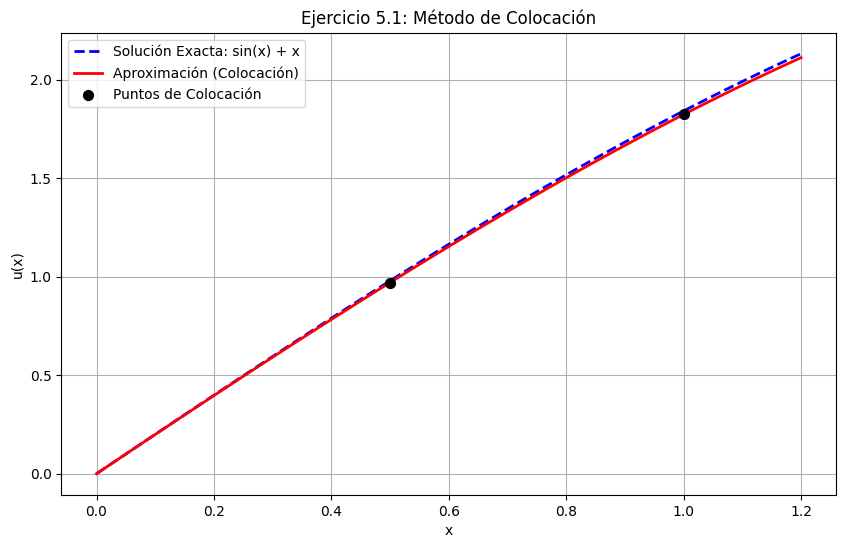

Error máximo estimado en [0, 1]: 0.017942


In [28]:

# ----------------------------------------------------------------------
# 4. GRAFICAR RESULTADOS Y ERROR
# ----------------------------------------------------------------------
print("\n--- Generando Gráficas ---")

# Solución exacta analítica para comparar: u(x) = sin(x) + x
u_exacta = sp.sin(x) + x

# Convertimos las expresiones simbólicas a funciones numéricas
f_aprox = sp.lambdify(x, u_final, 'numpy')
f_exacta = sp.lambdify(x, u_exacta, 'numpy')

# Creamos el dominio para graficar (de 0 a 1.2)
xx = np.linspace(0, 1.2, 100)
yy_aprox = f_aprox(xx)
yy_exact = f_exacta(xx)

# Graficamos
plt.figure(figsize=(10, 6))

# Gráfica de las soluciones
plt.plot(xx, yy_exact, 'b--', label='Solución Exacta: sin(x) + x', linewidth=2)
plt.plot(xx, yy_aprox, 'r-', label='Aproximación (Colocación)', linewidth=2)

# Puntos de colocación
plt.scatter([0.5, 1.0], [f_aprox(0.5), f_aprox(1.0)], color='black', s=50, zorder=5, label='Puntos de Colocación')

plt.title('Ejercicio 5.1: Método de Colocación')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el error máximo en el intervalo [0, 1]
error_func = sp.lambdify(x, sp.Abs(u_exacta - u_final), 'numpy')
xx_error = np.linspace(0, 1, 1000)
max_error = np.max(error_func(xx_error))
print(f"Error máximo estimado en [0, 1]: {max_error:.6f}")